In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./SampleSuperstore.csv')

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## NAN vals

In [5]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## Check unique vals

In [6]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

#### *we now know that we have only one country so we can drop it*

In [7]:
df.drop(['Country'], axis = 1, inplace=True)

In [8]:
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Visualizing

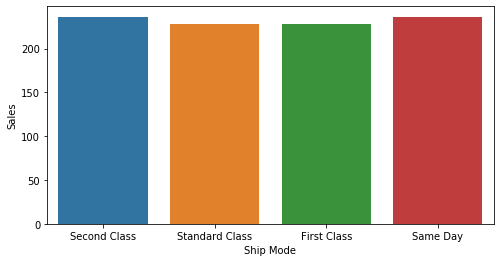

In [9]:
plt.figure(figsize=(8,4))
sns.barplot(x=df['Ship Mode'], y=df['Sales'], ci=None)
plt.show()

#### *Output: Ship mode doesn't affect sales that much*

### Total progit sales for sub category

C:\Users\NAIVEDH\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


<Figure size 1800x1296 with 0 Axes>

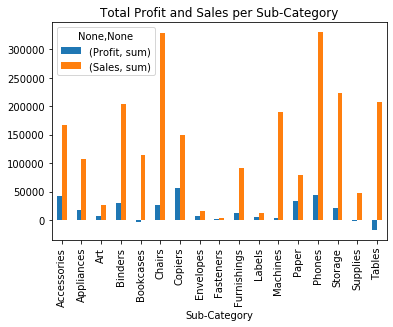

In [16]:
plt.figure(figsize=(25,18))
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
plt.show()

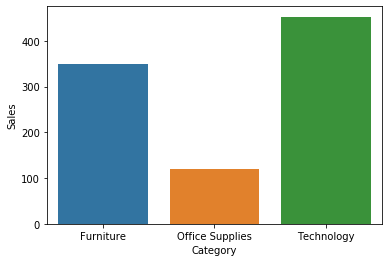

In [17]:
plt.figure(figsize=(6,4))
sns.barplot(x=df['Category'], y=df['Sales'], ci=None)
plt.show()

#### *Output: we need to increase sales of office supplies*

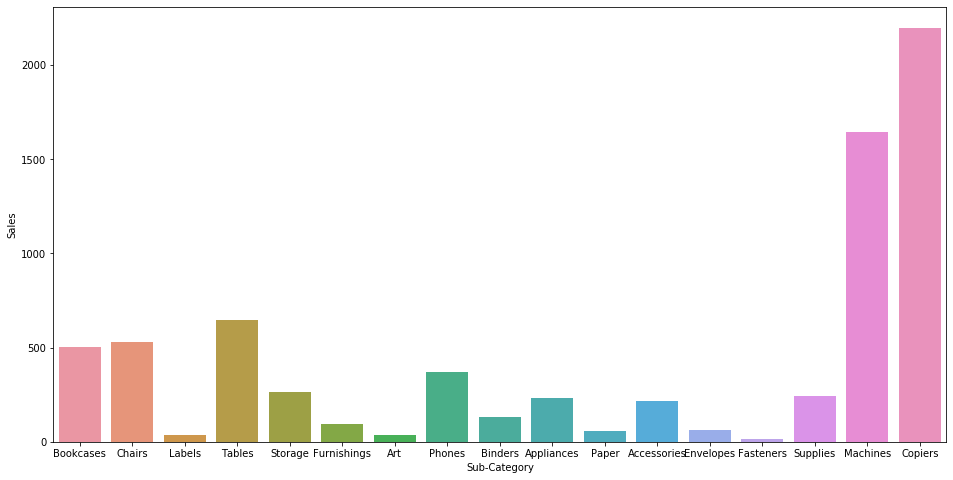

In [18]:
plt.figure(figsize=(16,8))
sns.barplot(x=df['Sub-Category'], y=df['Sales'], ci=None)
plt.show()

### Region wise category

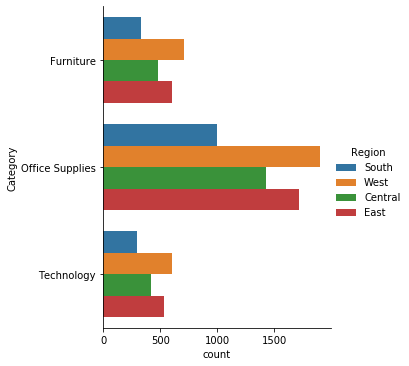

In [19]:
sns.catplot(y="Category", hue="Region", kind="count",data=df)

#### *Output: we need to increase sales of furniture and technology to boost profits*
#### *Output: we need to increase sales in south and central region*

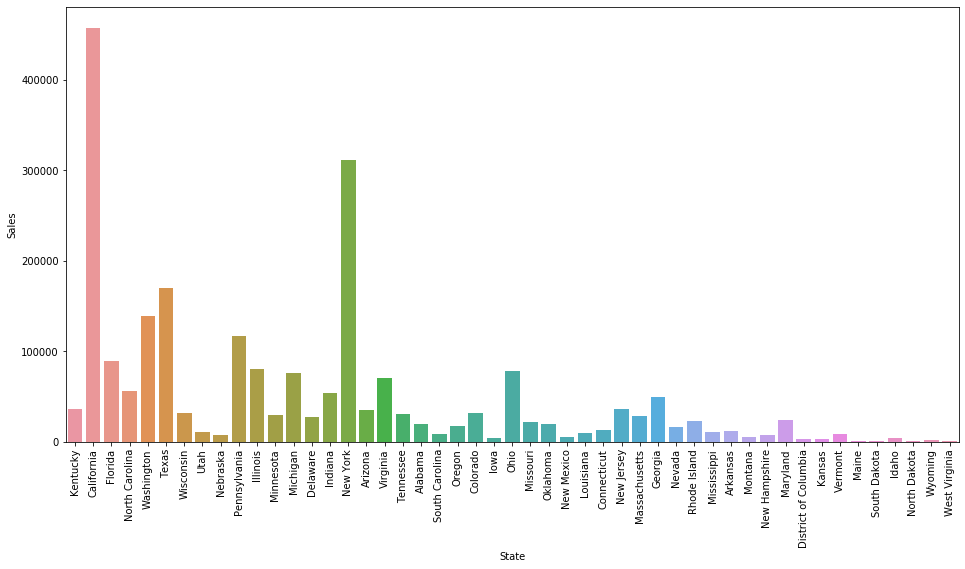

In [24]:
plt.figure(figsize=(16,8))
sns.barplot(x=df['State'], y=df['Sales'], ci=None, estimator=sum)
plt.xticks(rotation=90)
plt.show()

#### *Output: There are some state were improvement can be done*

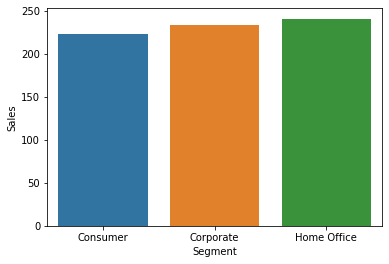

In [23]:
sns.barplot(x=df['Segment'], y=df['Sales'], ci=None)

#### *Output: we can try to increase consumer sales*